# Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

# Описание данных
Данные состоят из файлов, полученных из разных источников:\
**data_arc_new.csv** — данные об электродах;\
**data_bulk_new.csv** — данные о подаче сыпучих материалов (объём);\
**data_bulk_time_new.csv** — данные о подаче сыпучих материалов (время);\
**data_gas_new.csv** — данные о продувке сплава газом;\
**data_temp_new.csv** — результаты измерения температуры;\
**data_wire_new.csv** — данные о проволочных материалах (объём);\
**data_wire_time_new.csv** — данные о проволочных материалах (время).\
Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

**Цель исследования:** провести исследовательский анализ данных

**Задачи исследования:**
- провести анализ данных - рассмотреть сами данные и информацию про данные
- провести графический анализ данных - рассмотреть выбросы, распределения значений, корреляцию
- предложить варианты обработки данных
- составить примерный план работы
- составить вопросы

# 1 Загрузка данных

In [1]:
#загрузим все необходимые в работе библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

In [2]:
#загрузим данные

#данные об электродах
electrodes_path_1 = r"C:\Users\Naiana\Desktop\DS projects\Металлургия\data_arc_new.csv"
electrodes_path_2 = '/datasets/data_arc_new.csv'
if os.path.exists(electrodes_path_1):
    electrodes = pd.read_csv(electrodes_path_1, index_col=False)
elif os.path.exists(electrodes_path_2):
    electrodes = pd.read_csv(electrodes_path_2)
else: print('Something is wrong')

#данные о подаче сыпучих материалов (объём)
bulk_volume_path_1 = r"C:\Users\Naiana\Desktop\DS projects\Металлургия\data_bulk_new.csv"
bulk_volume_path_2 = '/datasets/data_bulk_new.csv'
if os.path.exists(bulk_volume_path_1):
    bulk_volume = pd.read_csv(bulk_volume_path_1, index_col=False)
elif os.path.exists(bulk_volume_path_2):
    bulk_volume = pd.read_csv(bulk_volume_path_2)
else: print('Something is wrong')

#данные о подаче сыпучих материалов (время)
bulk_time_path_1 = r"C:\Users\Naiana\Desktop\DS projects\Металлургия\data_bulk_time_new.csv"
bulk_time_path_2 = '/datasets/data_bulk_time_new.csv'
if os.path.exists(bulk_time_path_1):
    bulk_time = pd.read_csv(bulk_time_path_1, index_col=False)
elif os.path.exists(bulk_time_path_2):
    bulk_time = pd.read_csv(bulk_time_path_2)
else: print('Something is wrong')

#данные о продувке сплава газом
gas_path_1 = r"C:\Users\Naiana\Desktop\DS projects\Металлургия\data_gas_new.csv"
gas_path_2 = '/datasets/data_gas_new.csv'
if os.path.exists(gas_path_1):
    gas = pd.read_csv(gas_path_1, index_col=False)
elif os.path.exists(gas_path_2):
    gas = pd.read_csv(gas_path_2)
else: print('Something is wrong')

#результаты измерения температуры
temp_path_1 = r"C:\Users\Naiana\Desktop\DS projects\Металлургия\data_temp_new.csv"
temp_path_2 = '/datasets/data_temp_new.csv'
if os.path.exists(temp_path_1):
    temp = pd.read_csv(temp_path_1, index_col=False)
elif os.path.exists(temp_path_2):
    temp = pd.read_csv(temp_path_2)
else: print('Something is wrong')

#данные о проволочных материалах (объём)
wire_volume_path_1 = r"C:\Users\Naiana\Desktop\DS projects\Металлургия\data_wire_new.csv"
wire_volume_path_2 = '/datasets/data_wire_new.csv'
if os.path.exists(wire_volume_path_1):
    wire_volume = pd.read_csv(wire_volume_path_1, index_col=False)
elif os.path.exists(wire_volume_path_2):
    wire_volume = pd.read_csv(wire_volume_path_2)
else: print('Something is wrong')

#данные о проволочных материалах (время)
wire_time_path_1 = r"C:\Users\Naiana\Desktop\DS projects\Металлургия\data_wire_time_new.csv"
wire_time_path_2 = '/datasets/data_wire_time_new.csv'
if os.path.exists(wire_time_path_1):
    wire_time = pd.read_csv(wire_time_path_1, index_col=False)
elif os.path.exists(wire_time_path_2):
    wire_time = pd.read_csv(wire_time_path_2)
else: print('Something is wrong')

# 2 Исследование данных

**1. Рассмотрим данные про электроды**

**1. а) анализ данных**

In [4]:
electrodes.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


У нас есть 4 признака. Начало и конец нагрева дугой - временные признаки. Можно вычислить длительность нагрева. Активную и реактивную мощности следует изучить.

In [5]:
electrodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


Временные признаки имеют не подходящий тип данных. В данных нет пропусков.

**1. б) графический анализ данных**

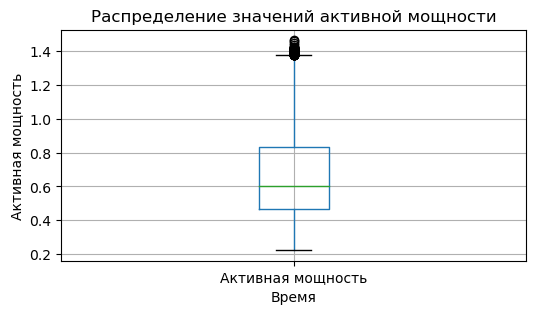

In [6]:
plt.figure(figsize=(6, 3))
plt.title('Распределение значений активной мощности')
plt.xlabel('Время')
plt.ylabel('Активная мощность')
electrodes.pivot_table(index=electrodes.index, values='Активная мощность').boxplot();

In [7]:
electrodes.pivot_table(index=electrodes.index, values='Активная мощность').describe()

,Активная мощность
count,14876.000000
mean,0.662752
std,0.258885
min,0.223120
25%,0.467115
50%,0.599587
75%,0.830070
max,1.463773


Вычислим 0% и 100%:\
0%: 0.57 - (0.74 - 0.57) * 1.5 = 0.315\
100%: 0.74 + (0.74 - 0.57) * 1.5 = 0.995

Значения активной мощности имеют небольшой разброс, нижние выбросы не превышают значение 0.315, верхние - не опускаются ниже 0.995.

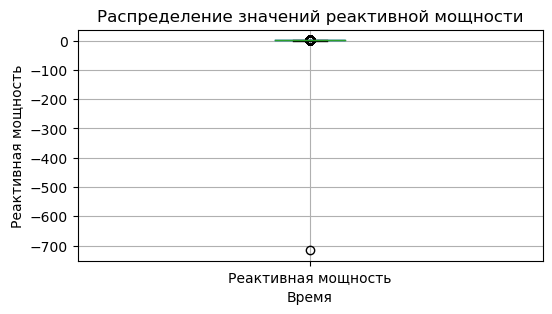

In [8]:
plt.figure(figsize=(6, 3))
plt.title('Распределение значений реактивной мощности')
plt.xlabel('Время')
plt.ylabel('Реактивная мощность')
electrodes.pivot_table(index=electrodes.index, values='Реактивная мощность').boxplot();

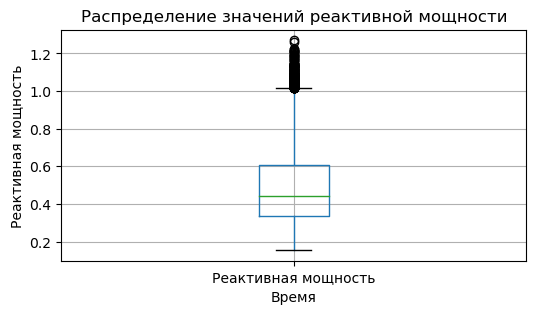

In [9]:
electrodes_drop = electrodes[electrodes['Реактивная мощность'] > -5]

plt.figure(figsize=(6, 3))
plt.title('Распределение значений реактивной мощности')
plt.xlabel('Время')
plt.ylabel('Реактивная мощность')
electrodes_drop.pivot_table(index=electrodes_drop.index, values='Реактивная мощность').boxplot();

На графике видно одно сильно выбивающееся значение. Рассмотрим график без него.

In [10]:
electrodes_drop.pivot_table(index=electrodes_drop.index, values='Реактивная мощность').describe()

,Реактивная мощность
count,14875.000000
mean,0.487115
std,0.197612
min,0.153777
25%,0.337190
50%,0.441665
75%,0.608223
max,1.270284


Вычислим 0% и 100%:\
0%: 0.417 - (0.543 - 0.417) * 1.5 = 0.228\
100%: 0.543 + (0.543 - 0.417) * 1.5 = 0.732

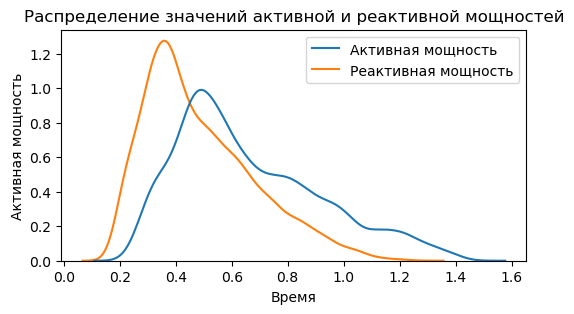

In [11]:
plt.figure(figsize=(6, 3))
plt.title('Распределение значений активной и реактивной мощностей')
plt.xlabel('Время')
plt.ylabel('Активная мощность')
sns.kdeplot(data=electrodes_drop[['Активная мощность', 'Реактивная мощность']]);

Данные обеих мощностей имеют один пик значений, до пика значения быстро повышаются, после - медленно уменьшаются. Рассмотрим корреляцию значений активной и реактивной мощностей.

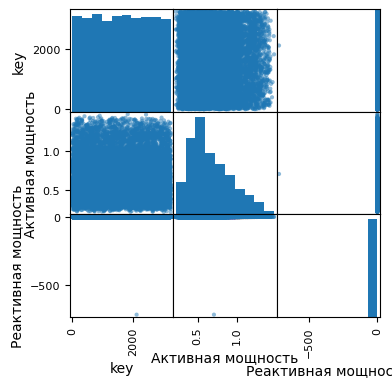

In [12]:
pd.plotting.scatter_matrix(electrodes, figsize=(4, 4));

На графике можно увидеть, что активная и реактивная мощности не зависят друг от друга.

In [13]:
electrodes['Активная мощность'].corr(electrodes['Реактивная мощность'], method='spearman')

0.9708786558173719

Рассмотрим корреляцию между активной и реактивной мощностями, используя коэффициент Спирмена. Корреляция очень высокая, значит в исследовании можно использовать только один признак.

**2. Рассмотрим данные о подаче сыпучих материалов (объём)**

**2. а) анализ данных**

In [14]:
bulk_volume.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [15]:
bulk_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


В данных 15 столбцов, каждый обозначает определённое сыпучее вещество. Скорее всего, каждая строка обозначает повтор цикла, при котором изучается химический состав смеси, и в зависимости от него в смесь добавляют разные вещества в разных количествах. Поэтому большое количество пропусков можно заменить нулями, т.к., скорее всего, при каждом повторе цикла не обязательно добавлять все 15 веществ.

**2. б) графический анализ данных**

Рассмотрим по отдельности на графиках распределения веществ, которые использовали очень часто, часто и редко.\
Очень часто использовались вещества: Bulk 3, Bulk 4, Bulk 12, Bulk 14, Bulk 15.\
Часто использовались вещества: Bulk 1, Bulk 6, Bulk 10, Bulk 11.\
Редко использовались вещества: Bulk 2, Bulk 5, Bulk 7, Bulk 8, Bulk 9, Bulk 13.

In [16]:
#объявим переменные для разных групп
bulk_volume_veryoften = bulk_volume[['Bulk 3', 'Bulk 4', 'Bulk 12', 'Bulk 14', 'Bulk 15']]
bulk_volume_often = bulk_volume[['Bulk 1', 'Bulk 6', 'Bulk 10', 'Bulk 11']]
bulk_volume_rare = bulk_volume[['Bulk 2', 'Bulk 5', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 13']]

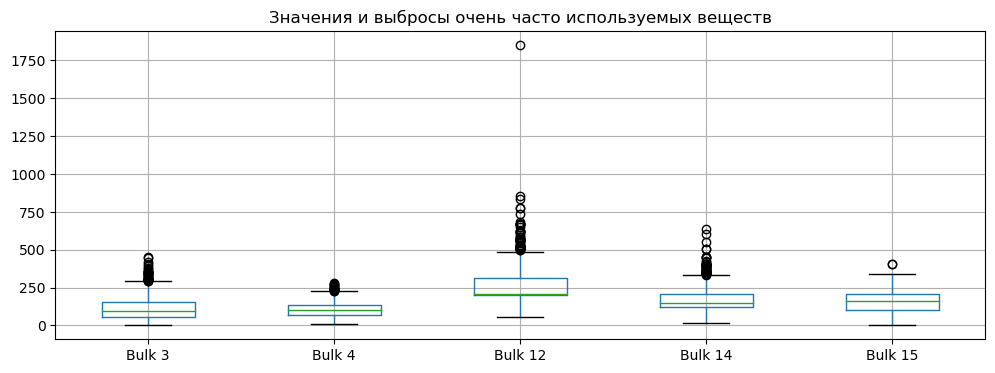

In [17]:
plt.figure(figsize=(12, 4))
plt.title('Значения и выбросы очень часто используемых веществ')
bulk_volume_veryoften.boxplot();

In [18]:
bulk_volume_veryoften.describe()

,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15
count,1298.000000,1014.000000,2450.000000,2806.000000,2248.000000
mean,113.879045,104.394477,260.471020,170.284747,160.513345
std,75.483494,48.184126,120.649269,65.868652,51.765319
min,6.000000,12.000000,53.000000,16.000000,1.000000
25%,58.000000,72.000000,204.000000,119.000000,105.000000
50%,97.500000,102.000000,208.000000,151.000000,160.000000
75%,152.000000,133.000000,316.000000,205.750000,205.000000
max,454.000000,281.000000,1849.000000,636.000000,405.000000


У всех очень часто используемых веществ есть выбросы. У вещества Bulk 12 есть одно сильно выбивающееся значение. На графике кажется, что нижние границы значений упираются в 0, но на самом деле у всех минимальное значение больше нуля, отрицательных значений нет.

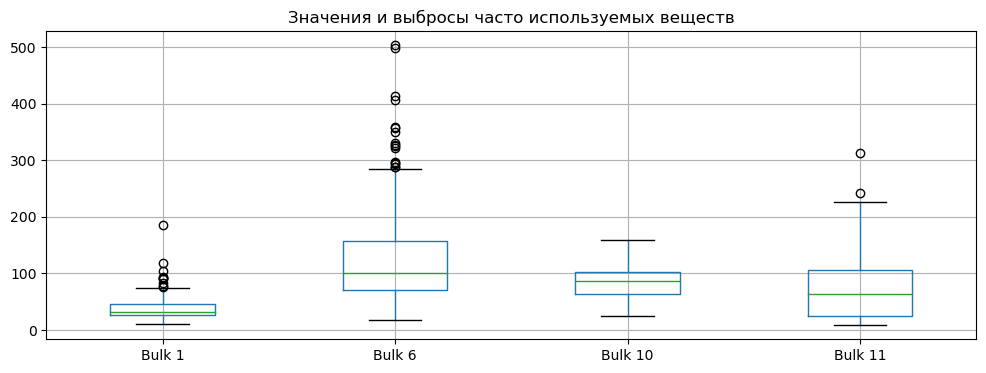

In [19]:
plt.figure(figsize=(12, 4))
plt.title('Значения и выбросы часто используемых веществ')
bulk_volume_often.boxplot();

In [20]:
bulk_volume_often.describe()

,Bulk 1,Bulk 6,Bulk 10,Bulk 11
count,252.000000,576.000000,176.000000,177.000000
mean,39.242063,118.925347,83.284091,76.819209
std,18.277654,72.057776,26.060347,59.655365
min,10.000000,17.000000,24.000000,8.000000
25%,27.000000,69.750000,64.000000,25.000000
50%,31.000000,100.000000,86.500000,64.000000
75%,46.000000,157.000000,102.000000,106.000000
max,185.000000,503.000000,159.000000,313.000000


У веществ Bulk 1 и Bulk 6 есть небольшое количество выбросов. У веществ Bulk 10 и Bulk 11 их почти нет.

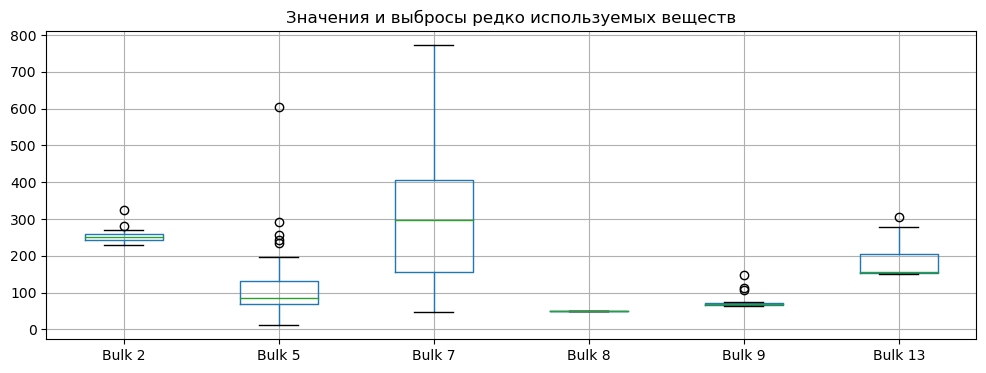

In [21]:
plt.figure(figsize=(12, 4))
plt.title('Значения и выбросы редко используемых веществ')
bulk_volume_rare.boxplot();

In [22]:
bulk_volume_rare.describe()

,Bulk 2,Bulk 5,Bulk 7,Bulk 8,Bulk 9,Bulk 13
count,22.000000,77.000000,25.000000,1.0,19.000000,18.000000
mean,253.045455,107.025974,305.600000,49.0,76.315789,181.111111
std,21.180578,81.790646,191.022904,NaN,21.720581,46.088009
min,228.000000,11.000000,47.000000,49.0,63.000000,151.000000
25%,242.000000,70.000000,155.000000,49.0,66.000000,153.250000
50%,251.500000,86.000000,298.000000,49.0,68.000000,155.500000
75%,257.750000,132.000000,406.000000,49.0,70.500000,203.500000
max,325.000000,603.000000,772.000000,49.0,147.000000,305.000000


У редко используемых веществ нет сильно выбивающихся и отрицательных значений.

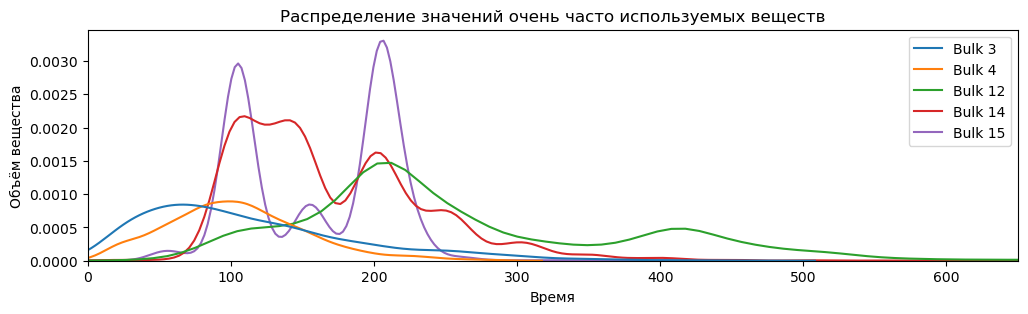

In [23]:
plt.figure(figsize=(12, 3))
plt.title('Распределение значений очень часто используемых веществ')
plt.xlabel('Время')
plt.ylabel('Объём вещества')
plt.xlim(0, 650)
sns.kdeplot(data=bulk_volume_veryoften);

На графике можно заметить то, что распределения веществ [Bulk 3, Bulk 4] и [Bulk 12, Bulk 14, Bulk 15] похожи.

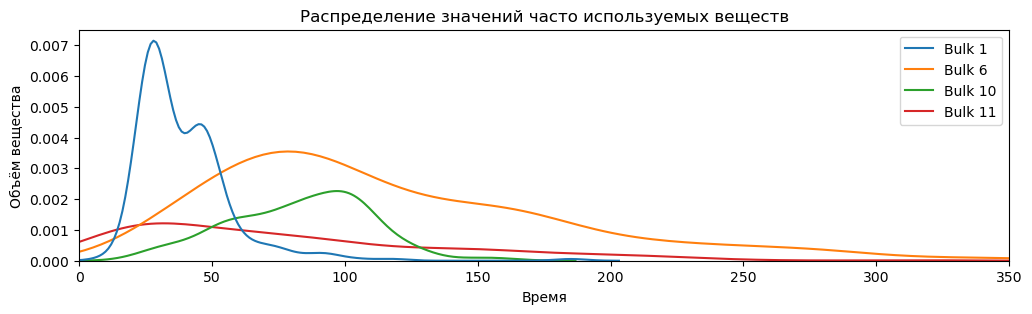

In [24]:
plt.figure(figsize=(12, 3))
plt.title('Распределение значений часто используемых веществ')
plt.xlabel('Время')
plt.ylabel('Объём вещества')
plt.xlim(0, 350)
sns.kdeplot(data=bulk_volume_often);

**3. Рассмотрим данные о подаче сыпучих материалов (время)**

**3. а) анализ данных**

In [25]:
bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [26]:
bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


Можно заметить, что количество значений и количество пропущенных значений аналогично количествам предыдущей таблицы с данными про объём сыпучих веществ.

**4. Рассмотрим данные о продувке сплава газом**

**4. а) анализ данных**

In [27]:
gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [28]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


Присутствует два пропуска в данных.

**4. б) графический анализ данных**

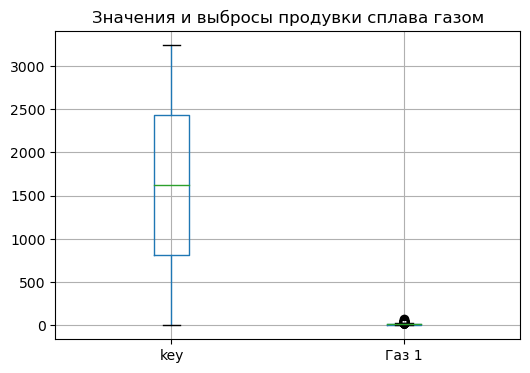

In [29]:
plt.figure(figsize=(6, 4))
plt.title('Значения и выбросы продувки сплава газом')
gas.boxplot();

In [30]:
gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Вычислим 0% и 100%:\
0%: 7.043 - (13.77 - 7.043) * 1.5 = -3.047\
100: 13.77 + (13.77 - 7.043) * 1.5 = 23.86

Нижнее значение нормальных значений упираются в минимум, верхнее значение - в значение 23.86. Присутствуют выбросы.

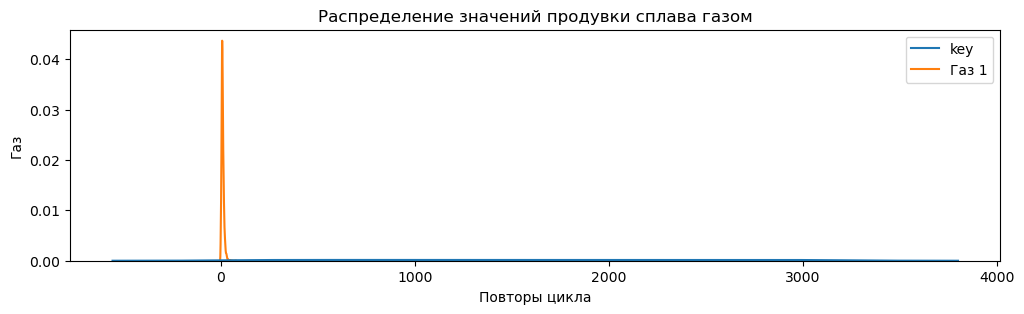

In [31]:
plt.figure(figsize=(12, 3))
plt.title('Распределение значений продувки сплава газом')
plt.xlabel('Повторы цикла')
plt.ylabel('Газ')
sns.kdeplot(data=gas);

**5. Рассмотрим данные о результатах измерения температуры**

**5. а) анализ данных**

In [32]:
temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [33]:
temp.tail()

,key,Время замера,Температура
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN
18091,3241,2019-09-06 17:30:05,NaN


In [34]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


В данных два столбца - один со значением времени, другой - со значениями температуры, измеренной в определённый момент. Присутствуют пропуски.

**5. б) графический анализ данных**

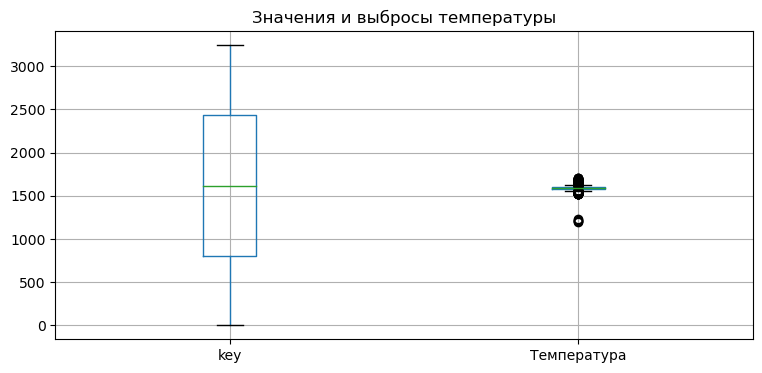

In [35]:
plt.figure(figsize=(9, 4))
plt.title('Значения и выбросы температуры')
temp_drop = temp.drop('Время замера', axis=1)
temp_drop.boxplot();

Присутствуют сильно выбивающиеся значения.

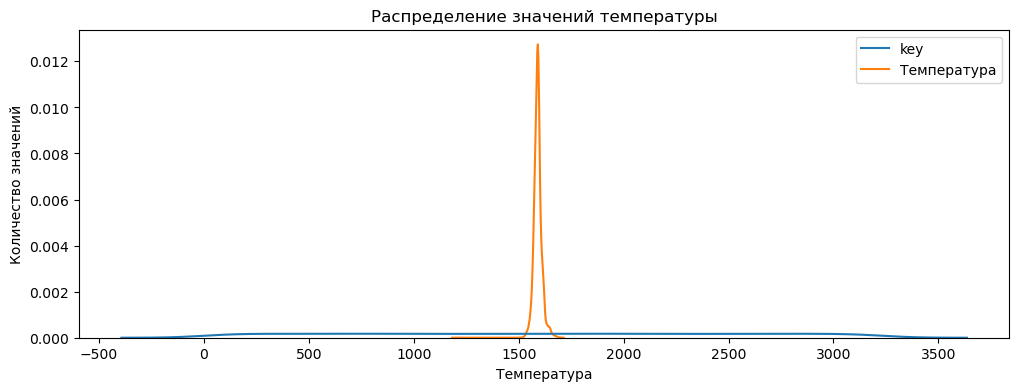

In [36]:
plt.figure(figsize=(12, 4))
plt.title('Распределение значений температуры')
plt.xlabel('Температура')
plt.ylabel('Количество значений')
sns.kdeplot(data=temp_drop);

Как видно на графике, абсолютное большинство значений приходится на промежуток (1500, 1700), пик значений находится между значениями 1500 и 1600.

**6. Рассмотрим данные о проволочных материалах (объём)**

**6. а) анализ данных**

In [37]:
wire_volume.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
wire_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


Как и в информации про сыпучие вещества, в данных присутствует много пропусков, скорее всего, из-за того, что на каждом повторе цикла требуются разные проволоки, и пропущенные значения можно заменить нулём.\
Можно заметить, что проволоки Wire 1 и Wire 2 использовались чаще всего. Вынесем их значения в отдельную переменную, остальные проволоки - в другую переменную.

In [39]:
wire_often = wire_volume[['Wire 1', 'Wire 2']]
wire_rare = wire_volume[['Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9']]

**6. б) графический анализ данных**

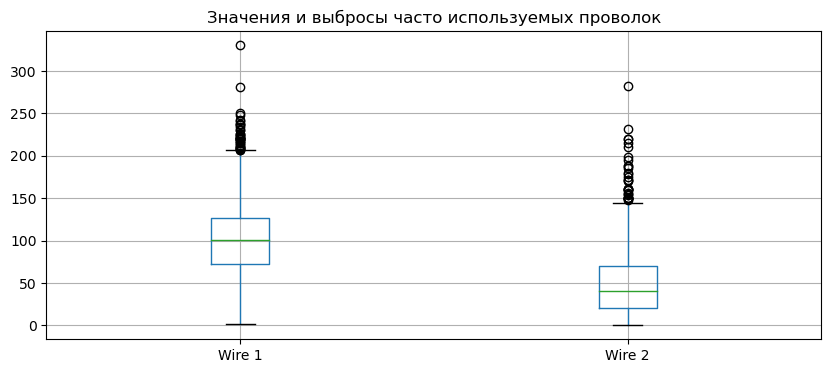

In [40]:
plt.figure(figsize=(10, 4))
plt.title('Значения и выбросы часто используемых проволок')
wire_often.boxplot();

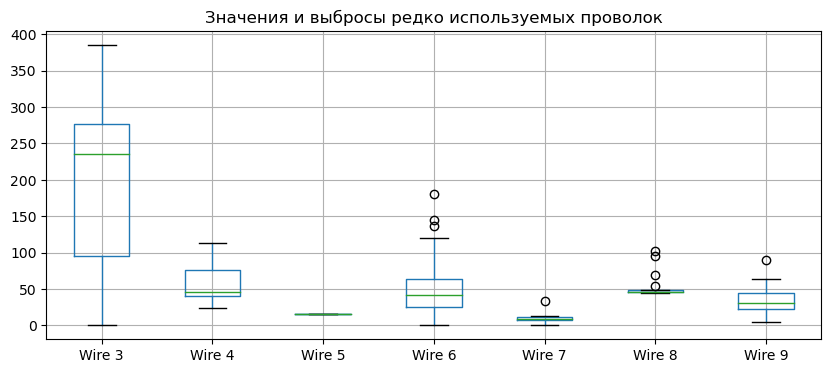

In [41]:
plt.figure(figsize=(10, 4))
plt.title('Значения и выбросы редко используемых проволок')
wire_rare.boxplot();

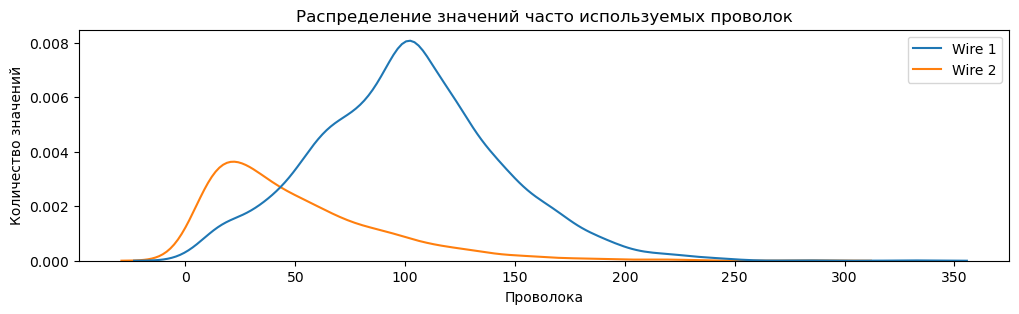

In [42]:
plt.figure(figsize=(12, 3))
plt.title('Распределение значений часто используемых проволок')
plt.xlabel('Проволока')
plt.ylabel('Количество значений')
sns.kdeplot(data=wire_often);

**7. Рассмотрим данные о проволочных материалах (время)**

In [43]:
wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


Можно заметить, что так же, как и в данных про сыпучие вещества, количество значений и пропусков в данных про время добавления проволоки совпадает с количествами значений и пропусков в данных про объём проволоки.

**Особенности данных:**

*1 электроды*
- Данные о времени имеют неверный тип данных
- Активная и реактивная мощности имеют сильную корреляцию
- Присутствует сильно выбивающееся значение реактивной мощности

*2 сыпучие материалы (объём)*
- Много пропусков
- Присутствует сильно выбивающееся значение вещества Bulk 12


*3 сыпучие материалы (время)*
- Данные о времени имеют неверный тип данных

*4 продувка газом*
- Присутствует два пропуска

*5 температура*
- Присутствуют сильно выбивающиеся значения 
- Присутствуют пропуски

*6 проволока (объём)*
- Много пропусков

*7 проволока (время)*
- Данные о времени имеют неверный тип данных

- Названия столбцов написаны на разных языках и не приведены к змеиному регистру
- Несмотря на одинаковое количество ключей, количества объектов в датасетах разные

**Вопросы:**

*1 электроды*
- Можно ли удалить реактивную мощность? 
- Можно ли вычислить длительность нагрева дугой электрода, а значения времени удалить?

*3 сыпучие материалы (время)*
- Что делать с пропусками?
- Можно ли не использовать в обучении значения времени? 

*5 температура*
- Чем заменить пропуски в значениях температуры?

*Остальные:*
- Что делать с временными значениями при соединении данных в одном датасете?
- При соединении всех данных в один датасет и группировке, можно ли использовать агрегации:\
*1 электроды:* вычислить временной промежуток нагрева дуги, активную мощность сложить\
*2 сыпучие материалы (объём):* сложить\
*3 сыпучие материалы (время):* удалить\
*4 газ:* без изменений\
*5 температура:* сложить/ вычислить среднее/ вычислить медиану\
*6 проволока (объём):* сложить\
*7 проволока (время):* удалить
- Нужны ли нам единицы измерения?
- Нужно ли нам масштабировать признаки?

**План работы:**

**1.** Провести предобработку данных:

*1 электроды*
- Данные о времени перевести во временной тип данных
- Активная и реактивная мощности имеют сильную корреляцию, удалить один признак
- Удалить сильно выбивающееся значение реактивной мощности

*2 сыпучие материалы (объём)*
- Заменить большое количество пропусков нулями
- Удалить выбивающееся значение вещества Bulk 12

*3 сыпучие материалы (время)*
- Привести столбец времени к временному типу

*4 продувка газом*
- Удалить два пропуска

*5 температура*
- Удалить выбивающиеся значения 

*6 проволока (объём)*
- Заменить большое количество пропусков нулями

*7 проволока (время)*
- Привести столбец времени к временному типу

- Привести названия столбцов к одному языку и змеиному регистру

**2.** Соединить все данные в одном датасете по ключу, используя группировку

**3.** Разделить данные на тренировочную и тестовую выборки (в обучении использовать кросс-валидацию)

**4.** Подобрать параметры с помощью GridSearch и обучить модели: дерево решений, случайный лес, линейная регрессия, LightGBM

**5.** Выбрать лучшую модель, доведя метрику до нужного значения

**6.** Протестировать лучшую модель на тестовой выборке

**7.** Анализ важности факторов лучшей модели

**8.** Сделать вывод

**9.** Написать отчёт от проделанной работе

# 3 Предобработка данных

1. Электроды

In [45]:
#переименуем столбцы
electrodes.columns = ['key', 'heating_start', 'heating_end', 'active_power', 'reactive_power']

In [46]:
#приведём столбцы с временными значениями к временному типу данных
electrodes['heating_start'] = pd.DatetimeIndex(electrodes['heating_start'])
electrodes['heating_end'] = pd.DatetimeIndex(electrodes['heating_end'])

In [47]:
#найдём время нагрева дуги
electrodes['heating_time'] = (electrodes['heating_end'] - electrodes['heating_start']) // pd.Timedelta(1, 'second')

In [48]:
electrodes.head()

,key,heating_start,heating_end,active_power,reactive_power,heating_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148


In [49]:
electrodes = electrodes.groupby('key')[['active_power', 'heating_time']].sum()

In [50]:
electrodes.head()

,active_power,heating_time
key,,
1,3.036730,1098
2,2.139408,811
3,4.063641,655
4,2.706489,741
5,2.252950,869


В исследовании не будем использовать временные значения начала и конца нагрева дуги, используем время нагрева дуги.

В предварительном анализе данных мы заметили, что активная и реактивная мощности сильно коррелируют друг с другом, поэтому для того, чтобы это не повлияло на обучение модели, используем в обучении только один признак - активную мощность.

In [51]:
electrodes.head()

,active_power,heating_time
key,,
1,3.036730,1098
2,2.139408,811
3,4.063641,655
4,2.706489,741
5,2.252950,869


In [52]:
electrodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   active_power  3214 non-null   float64
 1   heating_time  3214 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 75.3 KB


2. Сыпучие материалы (объём)

In [53]:
#переименуем столбцы
bulk_volume.columns = ['key', 'Bulk_1', 'Bulk_2', 'Bulk_3', 'Bulk_4', 'Bulk_5', 'Bulk_6', 'Bulk_7', 'Bulk_8', \
                      'Bulk_9', 'Bulk_10', 'Bulk_11', 'Bulk_12', 'Bulk_13', 'Bulk_14', 'Bulk_15']

In [54]:
bulk_volume.head()

,key,Bulk_1,Bulk_2,Bulk_3,Bulk_4,Bulk_5,Bulk_6,Bulk_7,Bulk_8,Bulk_9,Bulk_10,Bulk_11,Bulk_12,Bulk_13,Bulk_14,Bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [55]:
#заполним пропуски нулями
bulk_volume = bulk_volume.fillna(0)

In [56]:
3129 * 0.1

312.90000000000003

Как мы выяснили в предварительном исследовании данных, разные сыпучие вещества добавлялись в разных количествах. Вычислим 10% от общего количества итераций и удалим все признаки, которые по количеству итераций не превышают это значение - получилось ~313 итераций.

In [57]:
#удалим лишние столбцы
bulk_volume = bulk_volume.drop(['Bulk_1', 'Bulk_2', 'Bulk_5', 'Bulk_7', 'Bulk_8', \
                                'Bulk_9', 'Bulk_10', 'Bulk_11', 'Bulk_13'], axis=1)

In [58]:
bulk_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk_3   3129 non-null   float64
 2   Bulk_4   3129 non-null   float64
 3   Bulk_6   3129 non-null   float64
 4   Bulk_12  3129 non-null   float64
 5   Bulk_14  3129 non-null   float64
 6   Bulk_15  3129 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 171.2 KB


3. Сыпучие материалы (время)

Значения времени мы не будем использовать в обучении модели, т.к. они не дают практически никакой информации.

4. Продувка сплава газом

In [59]:
#переименуем столбец
gas.columns = ['key', 'gas_1']

In [60]:
gas.head()

,key,gas_1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [62]:
gas.isna().sum()

key      0
gas_1    0
dtype: int64

В данных нет пропусков.

In [63]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas_1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


5. Температура

In [64]:
#переименуем столбцы
temp.columns = ['key', 'temp_time', 'temperature']

In [65]:
temp.head()

,key,temp_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [66]:
#найдём количество пропущенных значений
temp.isna().sum()

key               0
temp_time         0
temperature    3427
dtype: int64

Посмотрим, сколько в данных пропущенных значений. В столбце с данными о температуре 3427 пропуска.

In [67]:
#рассчитаем начальную температуру
temp_start = temp.groupby('key')['temp_time'].min()
temp_start = pd.DataFrame(temp_start)
temp_start.head()

,temp_time
key,
1,2019-05-03 11:02:04
2,2019-05-03 11:34:04
3,2019-05-03 12:06:44
4,2019-05-03 12:39:27
5,2019-05-03 13:11:03


In [68]:
temp.head()

,key,temp_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [69]:
temp_start = temp_start.merge(temp, on='temp_time')
temp_start.columns = ['temp_start_time', 'key', 'start_temp']
temp_start.head()

,temp_start_time,key,start_temp
0,2019-05-03 11:02:04,1,1571.0
1,2019-05-03 11:34:04,2,1581.0
2,2019-05-03 12:06:44,3,1596.0
3,2019-05-03 12:39:27,4,1601.0
4,2019-05-03 13:11:03,5,1576.0


In [70]:
temp_start.isna().sum()

temp_start_time    0
key                0
start_temp         0
dtype: int64

Рассчитаем начальную температуру до нагрева и используем эти значения как признак.

In [71]:
#рассчитаем конечную температуру
temp_end = temp.groupby('key')['temp_time'].max()
temp_end = pd.DataFrame(temp_end)
temp_end.head()

,temp_time
key,
1,2019-05-03 11:30:38
2,2019-05-03 11:55:09
3,2019-05-03 12:35:57
4,2019-05-03 12:59:47
5,2019-05-03 13:36:39


In [72]:
temp_end = temp_end.merge(temp, on='temp_time')
temp_end.columns = ['temp_end_time', 'key', 'end_temp']
temp_end.head()

,temp_end_time,key,end_temp
0,2019-05-03 11:30:38,1,1613.0
1,2019-05-03 11:55:09,2,1602.0
2,2019-05-03 12:35:57,3,1599.0
3,2019-05-03 12:59:47,4,1625.0
4,2019-05-03 13:36:39,5,1602.0


In [73]:
temp_end.isna().sum()

temp_end_time      0
key                0
end_temp         739
dtype: int64

In [74]:
temp_end.tail()

,temp_end_time,key,end_temp
3211,2019-09-06 11:55:45,3237,NaN
3212,2019-09-06 12:34:37,3238,NaN
3213,2019-09-06 15:09:55,3239,NaN
3214,2019-09-06 16:35:26,3240,NaN
3215,2019-09-06 17:30:05,3241,NaN


Рассчитаем конечную температуру после нагрева. Это целевой признак, поэтому нам важно, чтобы в этих значениях не было пропусков.

In [75]:
temp_start.head()

,temp_start_time,key,start_temp
0,2019-05-03 11:02:04,1,1571.0
1,2019-05-03 11:34:04,2,1581.0
2,2019-05-03 12:06:44,3,1596.0
3,2019-05-03 12:39:27,4,1601.0
4,2019-05-03 13:11:03,5,1576.0


In [76]:
temp_end.head()

,temp_end_time,key,end_temp
0,2019-05-03 11:30:38,1,1613.0
1,2019-05-03 11:55:09,2,1602.0
2,2019-05-03 12:35:57,3,1599.0
3,2019-05-03 12:59:47,4,1625.0
4,2019-05-03 13:36:39,5,1602.0


In [77]:
#соединим данные о начальной и конечной температурах
temp = temp_start.merge(temp_end, on='key')

#удалим итерации, в которых есть только один замер температуры
temp = temp.query('temp_start_time != temp_end_time')

#удалим пропущенные значения
temp = temp.dropna()

#удалим аномалии
temp = temp.query('end_temp >= 1400')

In [78]:
#приведём столбцы с временными значениями к временному типу
temp['temp_start_time'] = pd.to_datetime(temp['temp_start_time'], format='%Y-%m-%d %H:%M:%S')
temp['temp_end_time'] = pd.to_datetime(temp['temp_end_time'], format='%Y-%m-%d %H:%M:%S')

#найдём время нагрева
temp['temp_delta'] = (temp['temp_end_time'] - temp['temp_start_time']) // pd.Timedelta(1, 'second')

#удалим временные значения
temp = temp.drop(['temp_start_time', 'temp_end_time'], axis=1)

In [79]:
temp.head()

,key,start_temp,end_temp,temp_delta
0,1,1571.0,1613.0,1714
1,2,1581.0,1602.0,1265
2,3,1596.0,1599.0,1753
3,4,1601.0,1625.0,1220
4,5,1576.0,1602.0,1536


In [80]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2476
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         2475 non-null   int64  
 1   start_temp  2475 non-null   float64
 2   end_temp    2475 non-null   float64
 3   temp_delta  2475 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 96.7 KB


6. Проволочные материалы (объём)

In [81]:
#переименуем столбцы
wire_volume.columns = ['key', 'Wire_1', 'Wire_2', 'Wire_3', 'Wire_4', 'Wire_5', 'Wire_6', 'Wire_7', 'Wire_8', 'Wire_9']

In [82]:
#заполним пропущенные значения нулями
wire_volume = wire_volume.fillna(0)

In [83]:
#удалим лишние столбцы
wire_volume = wire_volume.drop(['Wire_3', 'Wire_4', 'Wire_5', 'Wire_6', 'Wire_7', 'Wire_8', 'Wire_9'], axis=1)

Как и в таблице с данными про сыпучие материалы, удалим признаки, у которых мало значений, количество которых не превышает 313.

In [84]:
wire_volume.head()

,key,Wire_1,Wire_2
0,1,60.059998,0.00000
1,2,96.052315,0.00000
2,3,91.160157,0.00000
3,4,89.063515,0.00000
4,5,89.238236,9.11456


In [85]:
wire_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire_1  3081 non-null   float64
 2   Wire_2  3081 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 72.3 KB


7. Проволочные материалы (время)

Данные о времени добавления проволочных материалов в исследовании использовать не будем.

8. Объединение данных

Объединим все полученные данные в одну таблицу через метод INNER, т.к. нам нужно, чтобы у каждого объекта были заполнены все значения.

In [86]:
data = electrodes.copy()

In [87]:
#присоединим данные о сыпучих материалах к данным об электродах
data = data.merge(bulk_volume, on='key')

#присоединим данные о продувке газом
data = data.merge(gas, on='key')

#присоединим данные о температуре
data = data.merge(temp, on='key')

#присоединим данные о проволочных материалах
data = data.merge(wire_volume, on='key')

In [88]:
data.head()

,key,active_power,heating_time,Bulk_3,Bulk_4,Bulk_6,Bulk_12,Bulk_14,Bulk_15,gas_1,start_temp,end_temp,temp_delta,Wire_1,Wire_2
0,1,3.036730,1098,0.0,43.0,0.0,206.0,150.0,154.0,29.749986,1571.0,1613.0,1714,60.059998,0.00000
1,2,2.139408,811,0.0,73.0,0.0,206.0,149.0,154.0,12.555561,1581.0,1602.0,1265,96.052315,0.00000
2,3,4.063641,655,0.0,34.0,0.0,205.0,152.0,153.0,28.554793,1596.0,1599.0,1753,91.160157,0.00000
3,4,2.706489,741,0.0,81.0,0.0,207.0,153.0,154.0,18.841219,1601.0,1625.0,1220,89.063515,0.00000
4,5,2.252950,869,0.0,78.0,0.0,203.0,151.0,152.0,5.413692,1576.0,1602.0,1536,89.238236,9.11456


In [89]:
data = data.drop('key', axis=1)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   active_power  2329 non-null   float64
 1   heating_time  2329 non-null   int64  
 2   Bulk_3        2329 non-null   float64
 3   Bulk_4        2329 non-null   float64
 4   Bulk_6        2329 non-null   float64
 5   Bulk_12       2329 non-null   float64
 6   Bulk_14       2329 non-null   float64
 7   Bulk_15       2329 non-null   float64
 8   gas_1         2329 non-null   float64
 9   start_temp    2329 non-null   float64
 10  end_temp      2329 non-null   float64
 11  temp_delta    2329 non-null   int64  
 12  Wire_1        2329 non-null   float64
 13  Wire_2        2329 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 272.9 KB


- В данных осталось 2322 объекта - ~71.6% от исходного объёма данных
- Всего 14 признаков и 1 целевой признак.

9. Выделим признаки и целевой признак, тренировочную и тестовую выборки

In [93]:
data_train, data_test = train_test_split(data, test_size=0.25, random_state=170723)

Разделили данные на тренировочную и тестовую выборки.

In [94]:
#уберём выбросы в значениях газа
data_train = data_train.query('gas_1 < 40')

Доделали предобработку данных в тренировочной выборке - убрали выбросы в значениях газа - значения больше 40.

In [95]:
#разделим тренировочную выборку на признаки и целевой признак
features_train = data_train.drop('end_temp', axis=1)
target_train = data_train['end_temp']

features_train.shape, target_train.shape

((1740, 13), (1740,))

In [96]:
#разделим тестовую выборку на признаки и целевой признак
features_test = data_test.drop('end_temp', axis=1)
target_test = data_test['end_temp']

features_test.shape, target_test.shape

((583, 13), (583,))

Мы выделили тестовую выборку, которая занимает 25% от всех данных, т.к. в исследовании будем использовать кросс-валидацию.

# 4 Обучение моделей

Всего в исследовании используем 3 модели: дерево решений, случайный лес и LightGBM.

In [97]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

1. Дерево решений

In [98]:
#decision_tree_parameters = {'max_depth': range(1, 15, 1)}
#model = DecisionTreeRegressor(random_state=170723)

#grid = GridSearchCV(model, decision_tree_parameters, cv=5)
#grid.fit(features_train, target_train)
#grid.best_params_

Лучшая максимальная глубина для модели дерева решений - 5.

In [100]:
model = DecisionTreeRegressor(random_state=170723)
decision_tree_parameters = {'max_depth': range(1, 15, 1)}

grid = GridSearchCV(model, decision_tree_parameters, cv=5, scoring=scorer)
grid.fit(features_train, target_train)

print('Лучшие параметры модели дерева решений:', grid.best_params_)
print('МАЕ на модели дерева решений:', -grid.best_score_)

Лучшие параметры модели дерева решений: {'max_depth': 6}
МАЕ на модели дерева решений: 7.047401727379267


2. Случайный лес

In [101]:
#random_forest_parameters = {'n_estimators': range(1, 101, 10)}
#model = RandomForestRegressor(random_state=170723)

#grid = GridSearchCV(model, random_forest_parameters, cv=5)
#grid.fit(features_train, target_train)
#grid.best_params_

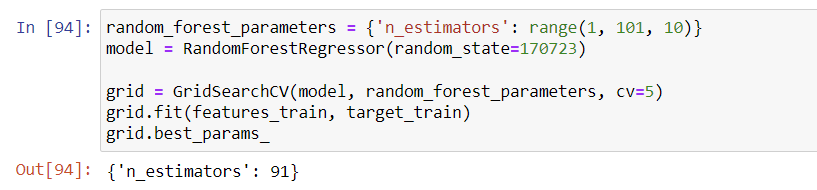

Используем лучшее значение максимальной глубины для модели дерева решений и найдём лучшее значение количества деревьев.

In [103]:
model = RandomForestRegressor(random_state=170723)
random_forest_parameters = {'n_estimators': range(1, 101, 10)}

grid = GridSearchCV(model, random_forest_parameters, cv=5, scoring=scorer)
grid.fit(features_train, target_train)

print('Лучшие параметры модели случайного леса:', grid.best_params_)
print('МАЕ на модели случайного леса:', -grid.best_score_)

Лучшие параметры модели случайного леса: {'n_estimators': 71}
МАЕ на модели случайного леса: 6.174129836490204


3. LightGBM

Для модели LightGBM используем лучшие значения максимальной глубины и количества деревьев моделей дерева решений и количества деревьев.

In [104]:
model = lgb.LGBMRegressor(max_depth=6, n_estimators=71, random_state=170723)
lgbm_list = cross_val_score(model, features_train, target_train, scoring=scorer, \
                                    n_jobs=-1, cv=5)
mae_lgbm = lgbm_list.mean()
print('МАЕ на модели LightGBM:', -mae_lgbm)

МАЕ на модели LightGBM: 5.997615018527485


In [105]:
mae_dict = {'Дерево решений': [7.0474], 'Случайный лес': [6.1741], 'LightGBM': [5.9976]}

mae_table = pd.DataFrame(mae_dict, index=['MAE'])
mae_table

,Дерево решений,Случайный лес,LightGBM
MAE,7.0474,6.1741,5.9976


Лучший результат метрики МАЕ на тренировочной выборке дала модель LightGBM - 5.99. Испытаем её на тестовой выборке.

4. Измерение метрики на тестовой выборке

In [107]:
model = lgb.LGBMRegressor(max_depth=6, n_estimators=71, random_state=170723)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
mae_lgbm_test = mean_absolute_error(target_test, predicted_test)
print('МАЕ модели LightGBM на тестовой выборке:', mae_lgbm_test)

МАЕ модели LightGBM на тестовой выборке: 6.25503103466698


Модель LightGBM на тестовой выборке дала результат 6.26 - меньше, чем пороговое значение 6.8.

5. Изучение важности признаков.

In [108]:
model = lgb.LGBMRegressor(max_depth=6, n_estimators=71, random_state=170723)
model.fit(features_train, target_train)

LGBMRegressor(max_depth=6, n_estimators=71, random_state=170723)

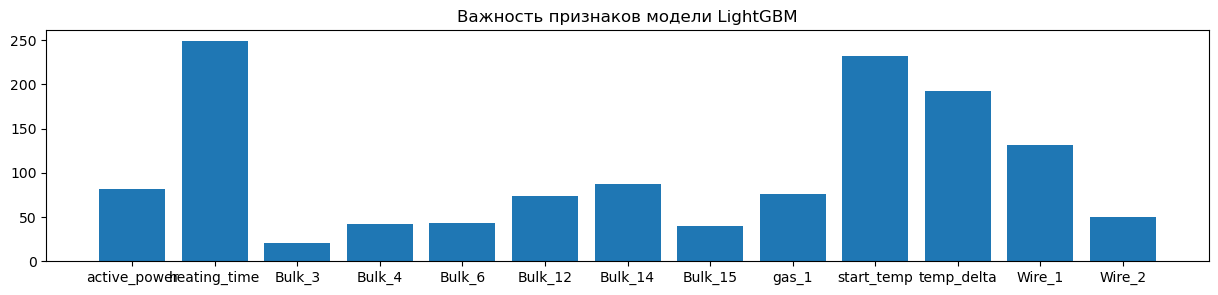

In [109]:
plt.figure(figsize=(15, 3))
plt.title('Важность признаков модели LightGBM')
plt.bar(features_train.columns, model.feature_importances_);

Наибольшее влияние на обучение модели имеют признаки: время нагрева электродов, газ, начальная температура, время нагрева, проволока 1, проволока 2.

На графике можно увидеть, что все признаки в той или иной степени влияют на обучение модели - все признаки делятся на те, которые влияют на обучение сильно и те, которые влияют на порядок слабее, но всё же влияют, и их большинство.

**ВЫВОД**

**Мы провели предобработку данных:**

1. Электроды\
Вычислили время нагрева дуги, найдя разницу между началом и концом нагрева.\
Из-за сильной корреляции активной и реактивной мощностей оставили в признаках только активную мощность.


2. Сыпучие вещества (объём)\
Заполнили пропуски нулями, т.к. отсуствие значения означает то, что в определённую итерацию данное вещество не добавляли.\
Удалили данные о тех сыпучих веществах, которые добавляли меньше, чем в 10% итераций.


3. Сыпучие вещества (время)\
Не использовали данные о времени добавления сыпучих веществ, т.к. для обучения эта информация бесполезна.


4. Газ\
Удалили редкие выбросы.


5. Температура\
Вычислили время нагрева, найдя разницу между временем первого и последнего замера итерации.\
Нашли начальную температуру, сгруппировав по ключу. Использовали в качестве признака.\
Нашли конечную температуру, сгруппировав по ключу. Использовали в качестве целевого признака.\
Удалили данные ою итерациях, имеющих только один замер температуры.\
Удалили аномальные значения температуры - меньше 1400 градусов.


6. Проволока (объём)\
Заполнили пропуски нулями, т.к. отсуствие значения означает то, что в определённую итерацию данную проволоку не добавляли.\
Удалили данные о тех проволоках, которые добавляли меньше, чем в 10% итераций.


7. Проволока (время)\
Не использовали данные о времени добавления проволоки, т.к. для обучения эта информация бесполезна.



**Обучили модели:**
- нашли лучшие значения гиперпараметров с помощью GridSearchCV
- обучили модели с помощью кросс-валидации

1. Дерево решений\
Нашли лучшее значение максимальной глубины - 6. На тренировочной выборке модель дала значение метрики МАЕ=7.0474

2. Случайный лес\
Использовали значение максимальной глубины из модели дерева решений и подобрали лучшее значение количества деревьев - 71. На тренировочной выборке модель дала значение МАЕ=6.1741.

3. **LightGBM - лучшая модель**\
Использовали значения гиперпараметров из моделей дерева решений и случайного леса. **На тренировочной выборке модель дала лучшее значение МАЕ=5.9976.**  \
Мы испытали модель на тестовой выборке, на которой **модель LightGBM с гиперпараметрами max_depth=6 и n_estimators=71 дала значение метрики МАЕ 6.26, тем самым преодолев порог 6.8.**


**Изучили важность признаков для моделей**\
Наибольшее влияние на обучение модели имеют признаки: время нагрева электродов, газ, начальная температура, время нагрева, проволока 1, проволока 2.

На графике можно увидеть, что все признаки в той или иной степени влияют на обучение модели - все признаки делятся на те, которые влияют на обучение сильно и те, которые влияют на порядок слабее, но всё же влияют, и их большинство. Это значит, лишних признаков в данных нет.

# 5 Отчёт

**1. Какие пункты плана были выполнены, какие - нет?**

**1.** Провести предобработку данных:

*1 электроды*
- Данные о времени перевести во временной тип данных - ***да*** *, были переведены во временной тип для создания нового признака - времени нагрева*
- Активная и реактивная мощности имеют сильную корреляцию, удалить один признак - ***да*** *, была использована только активная мощность*
- Удалить сильно выбивающееся значение реактивной мощности - ***нет*** *, реактивная мощность не была использована в исследовании*

*2 сыпучие материалы (объём)*
- Заменить большое количество пропусков нулями - ***да***
- Удалить выбивающееся значение вещества Bulk 12 - ***нет*** *, выбивающееся значение было всего одно*

*3 сыпучие материалы (время)*
- Привести столбец времени к временному типу - ***нет*** *,данные о времени не использовались в исследовании*

*4 продувка газом*
- Удалить два пропуска - ***да***

*5 температура*
- Удалить выбивающиеся значения - ***да***

*6 проволока (объём)*
- Заменить большое количество пропусков нулями ***да***

*7 проволока (время)*
- Привести столбец времени к временному типу - ***нет*** *, данные о времени не использовались в исследовании*

- Привести названия столбцов к одному языку и змеиному регистру - ***да***

**2.** Соединить все данные в одном датасете по ключу, используя группировку - ***да***

**3.** Разделить данные на тренировочную и тестовую выборки (в обучении использовать кросс-валидацию) - ***да***

**4.** Подобрать параметры с помощью GridSearch и обучить модели: дерево решений, случайный лес, линейная регрессия, LightGBM - ***да*** *, но не была использована линейная регрессия, т.к. она вряд ли дала бы значение метрики лучше, чем LightGBM*

**5.** Выбрать лучшую модель, доведя метрику до нужного значения - ***да***

**6.** Протестировать лучшую модель на тестовой выборке - ***да***

**7.** Анализ важности факторов лучшей модели ***да***

**8.** Сделать вывод ***да***

**9.** Написать отчёт от проделанной работе ***да***


**2. Какие трудности возникли и как вы их преодолели?**

Метрика не опускалась ниже порогового значения 6.8. 

Удалось довести её до нужного значения с помощью:
- добавления новых признаков: времени нагрева дуги, начальной температуры, времени нагрева
- удаления одного из коррелирующих признаков - реактивной мощности - в таблице электродов
- удаления выбросов в таблице продувки газом
- удаления выбросов в таблице температуры
- удаления итераций с одним замером температуры

**3. Какие ключевые шаги в решении задачи выделили?**

- создание новых признаков
- тщательное изучение и удаление выбросов
- подбор оптимального набора признаков для обучения
- поиск лучших гиперпараметров моделей

**4. Какая ваша итоговая модель и какое у неё качество?**

Итоговая модель - LightGBM с качеством МАЕ=6.26.

**5. Список признаков, используемых для обучения лучшей модели и описание их предобработки.**

- **активная мощность**: группировка по ключу, функция агрегации - сумма
- **время нагрева дуги**: группировка по ключу, функция агрегации - сумма
- **сыпучие вещества №3, №4, №6, №12, №14, №15**: заполнение пропусков нулями
- **газ**: удаление выбросов в тренировочной выборке
- **начальная температура**: группировка по ключу, функция агрегации - температура с минимальным значением времени
- **время нагрева**: разница между максимальным и минимальным временем замера температуры у одного ключа
- **проволока  №1, №2**: заполнение пропусков нулями

**6. Гиперпараметры лучшей модели, включая random_state.**

- максимальная глубина max_depth=6 - значение, подобранное GridSearchCV для модели дерева решений
- количество деревьев n_estimators=71 - значение, подобранное GridSearchCV для модели случайного леса
- random_state=170723

**7. Что рекомендуете для улучшения модели, решения**

Улучшить модель LightGBM можно было бы, подобрав большее количество гиперпараметров (помимо максимальной глубины и количества деревьев) именно для этой модели, а не используя гиперпараметры, подобранные для других моделей.